# Stocks

In [21]:
# Financial data.
import yfinance as yf

# Dates and times.
import datetime as dt

In [22]:
# Get data for Microsoft, Apple, and Google.
df = yf.download(['MSFT', 'AAPL', 'GOOG'], period="1d", interval="1m")

[*********************100%***********************]  3 of 3 completed


In [23]:
# Just the closing prices.
df['Close']

Ticker,AAPL,GOOG,MSFT
Datetime,,,
2024-11-22 14:30:00+00:00,228.731003,166.675003,412.040009
2024-11-22 14:31:00+00:00,228.759995,165.720001,411.464996
2024-11-22 14:32:00+00:00,229.001007,166.940002,412.230011
2024-11-22 14:33:00+00:00,228.970001,166.860001,412.635010
2024-11-22 14:34:00+00:00,228.779999,167.039993,412.809906
...,...,...,...
2024-11-22 20:55:00+00:00,229.850006,166.669998,416.779999
2024-11-22 20:56:00+00:00,229.889999,166.610001,416.740906
2024-11-22 20:57:00+00:00,230.005005,166.585007,416.869995


In [24]:
# Get the current date and time.
filename = dt.datetime.now()
# Create a string from the current date and time.
filename = filename.strftime("%Y%m%d_%H%M%S")
# Prepend data folders, append file extension.
filename = 'data/' + filename + ".csv"

# Show the filename.
filename

'data/20241124_153337.csv'

In [25]:
# Save the data to a CSV file.
df['Close'].to_csv(filename)

## 📈 Stock Data Visualisation

This notebook loads the latest stock price CSV file, processes it, and generates:
- Line chart of close prices
- 5-minute moving averages
- Histogram of minute-by-minute returns
- Candlestick chart for MSFT
---

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# Use full path to your CSV
df = pd.read_csv(r'C:\repos\stocks\data\20241124_153337.csv', index_col=0, parse_dates=True)

# Show the first few rows
df.head()

,AAPL,GOOG,MSFT
Datetime,,,
2024-11-22 14:30:00+00:00,228.731003,166.675003,412.040009
2024-11-22 14:31:00+00:00,228.759995,165.720001,411.464996
2024-11-22 14:32:00+00:00,229.001007,166.940002,412.230011
2024-11-22 14:33:00+00:00,228.970001,166.860001,412.635010
2024-11-22 14:34:00+00:00,228.779999,167.039993,412.809906


In [5]:
# Calculate moving averages
df_ma = df.rolling(window=5).mean()

# Calculate returns
returns = df.pct_change().dropna()

# Prepare OHLC data for MSFT
ohlc = df['MSFT'].resample('5T').ohlc().dropna()

C:\Users\hugoc\AppData\Local\Temp\ipykernel_18480\1702638509.py:8: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  ohlc = df['MSFT'].resample('5T').ohlc().dropna()


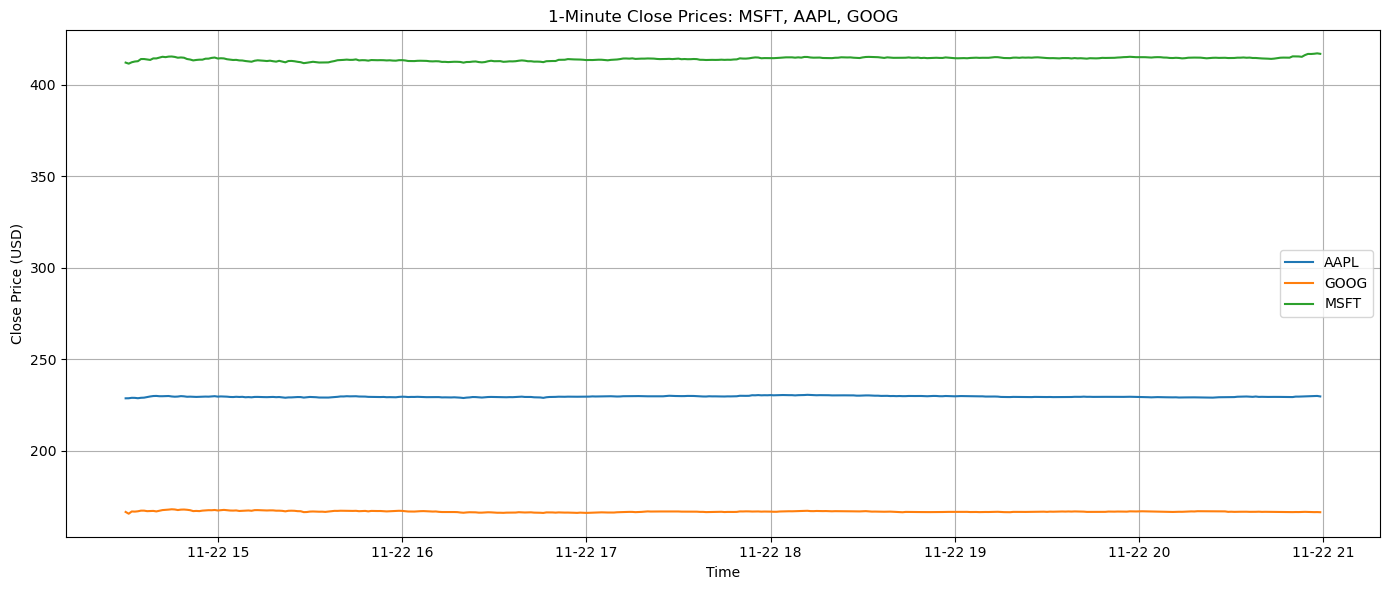

In [6]:
plt.figure(figsize=(14, 6))
for ticker in df.columns:
    plt.plot(df.index, df[ticker], label=ticker)
plt.title('1-Minute Close Prices: MSFT, AAPL, GOOG')
plt.xlabel('Time')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

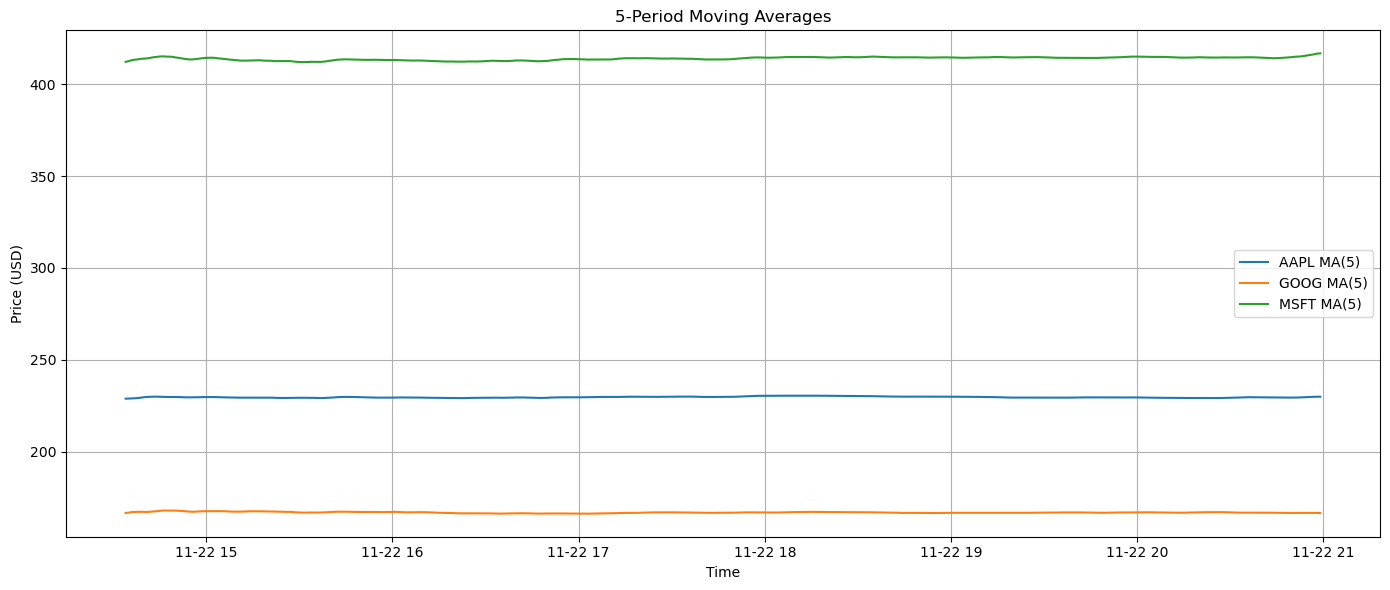

In [7]:
plt.figure(figsize=(14, 6))
for ticker in df.columns:
    plt.plot(df_ma.index, df_ma[ticker], label=f"{ticker} MA(5)")
plt.title('5-Period Moving Averages')
plt.xlabel('Time')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

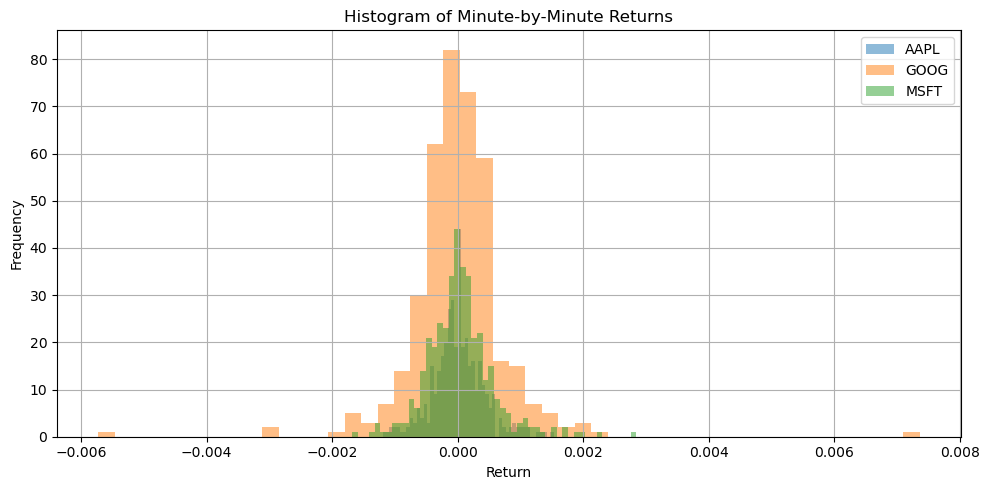

In [8]:
plt.figure(figsize=(10, 5))
for ticker in returns.columns:
    returns[ticker].hist(alpha=0.5, bins=50, label=ticker)
plt.title('Histogram of Minute-by-Minute Returns')
plt.xlabel('Return')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()

In [9]:
fig = go.Figure(data=[go.Candlestick(x=ohlc.index,
                open=ohlc['open'],
                high=ohlc['high'],
                low=ohlc['low'],
                close=ohlc['close'])])
fig.update_layout(title='MSFT 5-Minute Candlestick Chart',
                  xaxis_title='Time',
                  yaxis_title='Price (USD)')
fig.show()

## End